<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#list-IGH-files" data-toc-modified-id="list-IGH-files-4.1">list IGH files</a></span></li></ul></li><li><span><a href="#Find-IGH-isotypes" data-toc-modified-id="Find-IGH-isotypes-5">Find IGH isotypes</a></span><ul class="toc-item"><li><span><a href="#IGH-isotypes-in-cohort" data-toc-modified-id="IGH-isotypes-in-cohort-5.1">IGH isotypes in cohort</a></span></li><li><span><a href="#IGH-isotypes-in-immune-clusters" data-toc-modified-id="IGH-isotypes-in-immune-clusters-5.2">IGH isotypes in immune clusters</a></span></li></ul></li><li><span><a href="#IGH-in-MBs" data-toc-modified-id="IGH-in-MBs-6">IGH in MBs</a></span></li><li><span><a href="#Numbers-in-text" data-toc-modified-id="Numbers-in-text-7">Numbers in text</a></span><ul class="toc-item"><li><span><a href="#CDR3-length-histograms" data-toc-modified-id="CDR3-length-histograms-7.1">CDR3 length histograms</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(gridExtra)

In [3]:
library(plyr)
library(dplyr)
library(Hmisc)
library(reshape2)
library(grid)
library(gtable)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:plyr’:

    is.discrete, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




# Functions

In [4]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")
source("~/OneDrive - UHN/R_src/Oncoprint_functions.R")
source("~/OneDrive - UHN/R_src/diversity_Splot_functions.R")

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




# Paths

In [5]:
mountpath <- "/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/"

In [6]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [7]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

## list IGH files

In [8]:
allfiles <- list.files(paste0(mountpath, "MIXCR"), pattern = "IGH", full.names = T, recursive = T)

In [9]:
head(allfiles)

[1] "/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-10_717108.txt"  
[2] "/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-100_601598.txt" 
[3] "/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-101_588338.txt" 
[4] "/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-1038_711661.txt"
[5] "/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-104_717154.txt" 
[6] "/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-1052_577728.txt"

exclude tcga

In [10]:
allfiles <- allfiles[!grepl("TCGA", allfiles)]

remove clustered files

In [11]:
allfiles <- allfiles[!grepl("Clustered", allfiles)]

find empty files and remove

In [12]:
length(readLines(allfiles[1]))

[1] 12

In [13]:
tmp <- lapply(allfiles, function(f){length(readLines(f))})

In [14]:
names(tmp) <- allfiles

In [15]:
head(tmp)

$`/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-10_717108.txt`
[1] 12

$`/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-100_601598.txt`
[1] 356

$`/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-101_588338.txt`
[1] 5

$`/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-1038_711661.txt`
[1] 19

$`/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-104_717154.txt`
[1] 13

$`/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/MIXCR/CBTTC/CLONES_IGH_7316-1052_577728.txt`
[1] 1

add all non-empty files in a list

In [16]:
all.files <- lapply(names(tmp)[tmp >1], 
                    function(f){read.table(f, header = TRUE, sep = "\t", stringsAsFactors = F)})

Add filenames as names

In [17]:
myfilesnames <- names(tmp)[tmp >1]

In [18]:
names(all.files) <- gsub(".*CLONES_IGH_", "", myfilesnames)
names(all.files) <- gsub(".txt", "", names(all.files))

bind all in a df

In [19]:
all <- do.call("rbind", all.files)

In [20]:
head(all)

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,⋯,nSeqFR4,minQualFR4,aaSeqFR1,aaSeqCDR1,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>
7316-10_717108.1,0,6,0.22222222,TGTGCGAAAGGGAGGGCGACTATGTTGGGCTCCTTTGCCTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,"IGHV3-30*00(395.7),IGHV3-53*00(395.7),IGHV3-66*00(395.7),IGHV3-23*00(394.7),IGHV3-33*00(379.7)","IGHD3-10*00(30),IGHD3-22*00(30)",IGHJ4*00(143.3),IGHA1*00(352.3),342|349|373|0|7||35.0;339|346|370|0|7||35.0;339|346|370|0|7||35.0;342|352|373|0|10||50.0;342|349|373|0|7||35.0,⋯,NA,NA,NA,NA,NA,NA,NA,CAKGRATMLGSFAYW,NA,:::::::::0:-4:7:18:-5:-20:24:32:-4:45:::
7316-10_717108.2,1,5,0.18518519,TGTGCGAGAGATGATGATACTAGTGGACATTACGGGTTATTTCACTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,"IGHV3-33*00(287),IGHV3-30*00(272),IGHV3-48*00(271),IGHV3-66*00(256),IGHV3-7*00(255)",IGHD3-22*00(52),IGHJ4*00(183),IGHA2*00(240),342|354|373|0|12||60.0;342|354|373|0|12||60.0;342|354|373|0|12||60.0;339|351|370|0|12||60.0;342|354|373|0|12||60.0,⋯,NA,NA,NA,NA,NA,NA,NA,CARDDDTSGHYGLFHYW,NA,:::::::::0:1:12:13:-8:-3:33:39:-5:51:::
7316-10_717108.3,3,4,0.14814815,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,IGHV3-60*00(92),"IGHD5-24*00(30),IGHD6-19*00(30)",IGHJ1*00(170),IGHA1*00(315),343|347|374|0|4||20.0,⋯,NA,NA,NA,NA,NA,NA,NA,CARDAAIEYFEYW,NA,:::::::::0:-7:4:14:12:-26:20:20:-2:39:::
7316-10_717108.4,4,3,0.11111111,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,IGHV3-7*00(678),"IGHD5-18*00(65),IGHD5-5*00(65)","IGHJ4*00(190),IGHJ5*00(175)","IGHG1*00(104),IGHG2*00(104),IGHGP*00(104)",342|350|373|0|8||40.0,⋯,NA,NA,NA,NA,NA,NA,NA,CASLDTAISPVNAYW,NA,:::::::::0:-3:8:10:-1:-6:23:38:-10:45:::
7316-10_717108.5,5,3,0.11111111,TGTGCGAGAGACTGGGGGAGTGGTTATTTGGTCCATGACTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,"IGHV1-18*00(138),IGHV1-2*00(138),IGHV3-11*00(138),IGHV3-53*00(138),IGHV4-4*00(122)",IGHD3-3*00(60),IGHJ4*00(205),"IGHG1*00(154),IGHG2*00(154),IGHGP*00(138)",342|353|373|0|11||55.0;342|353|373|0|11||55.0;342|353|373|0|11||55.0;339|350|370|0|11||55.0;339|350|370|0|11||55.0,⋯,NA,NA,NA,NA,NA,NA,NA,CARDWGSGYLVHDYW,NA,:::::::::0:0:11:16:-14:-5:28:35:-7:45:::
7316-10_717108.6,9,1,0.03703704,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,"IGHV3-23*00(99),IGHV4-31*00(93),IGHV4-4*00(93),IGHV4-59*00(93),IGHV4-61*00(93)","IGHD3-10*00(30),IGHD6-25*00(30),IGHD6-6*00(30)",IGHJ6*00(196),,342|349|373|0|7||35.0;345|354|376|0|9||45.0;339|348|370|0|9||45.0;339|348|370|0|9||45.0;345|354|376|0|9||45.0,⋯,NA,NA,NA,NA,NA,NA,NA,CARHPPVRGIFAAEYYYYMDVW,NA,:::::::::0:-4:7:21:-14:-11:27:45:-11:66:::


add filenmaes as a variable and remove rownmaes

In [21]:
all$filename <- rep(names(all.files), sapply(all.files, nrow))

In [22]:
rownames(all) <- NULL

In [23]:
head(all)

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,⋯,minQualFR4,aaSeqFR1,aaSeqCDR1,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,filename
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>
1,0,6,0.22222222,TGTGCGAAAGGGAGGGCGACTATGTTGGGCTCCTTTGCCTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,"IGHV3-30*00(395.7),IGHV3-53*00(395.7),IGHV3-66*00(395.7),IGHV3-23*00(394.7),IGHV3-33*00(379.7)","IGHD3-10*00(30),IGHD3-22*00(30)",IGHJ4*00(143.3),IGHA1*00(352.3),342|349|373|0|7||35.0;339|346|370|0|7||35.0;339|346|370|0|7||35.0;342|352|373|0|10||50.0;342|349|373|0|7||35.0,⋯,NA,NA,NA,NA,NA,NA,CAKGRATMLGSFAYW,NA,:::::::::0:-4:7:18:-5:-20:24:32:-4:45:::,7316-10_717108
2,1,5,0.18518519,TGTGCGAGAGATGATGATACTAGTGGACATTACGGGTTATTTCACTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,"IGHV3-33*00(287),IGHV3-30*00(272),IGHV3-48*00(271),IGHV3-66*00(256),IGHV3-7*00(255)",IGHD3-22*00(52),IGHJ4*00(183),IGHA2*00(240),342|354|373|0|12||60.0;342|354|373|0|12||60.0;342|354|373|0|12||60.0;339|351|370|0|12||60.0;342|354|373|0|12||60.0,⋯,NA,NA,NA,NA,NA,NA,CARDDDTSGHYGLFHYW,NA,:::::::::0:1:12:13:-8:-3:33:39:-5:51:::,7316-10_717108
3,3,4,0.14814815,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,IGHV3-60*00(92),"IGHD5-24*00(30),IGHD6-19*00(30)",IGHJ1*00(170),IGHA1*00(315),343|347|374|0|4||20.0,⋯,NA,NA,NA,NA,NA,NA,CARDAAIEYFEYW,NA,:::::::::0:-7:4:14:12:-26:20:20:-2:39:::,7316-10_717108
4,4,3,0.11111111,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,IGHV3-7*00(678),"IGHD5-18*00(65),IGHD5-5*00(65)","IGHJ4*00(190),IGHJ5*00(175)","IGHG1*00(104),IGHG2*00(104),IGHGP*00(104)",342|350|373|0|8||40.0,⋯,NA,NA,NA,NA,NA,NA,CASLDTAISPVNAYW,NA,:::::::::0:-3:8:10:-1:-6:23:38:-10:45:::,7316-10_717108
5,5,3,0.11111111,TGTGCGAGAGACTGGGGGAGTGGTTATTTGGTCCATGACTACTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,"IGHV1-18*00(138),IGHV1-2*00(138),IGHV3-11*00(138),IGHV3-53*00(138),IGHV4-4*00(122)",IGHD3-3*00(60),IGHJ4*00(205),"IGHG1*00(154),IGHG2*00(154),IGHGP*00(138)",342|353|373|0|11||55.0;342|353|373|0|11||55.0;342|353|373|0|11||55.0;339|350|370|0|11||55.0;339|350|370|0|11||55.0,⋯,NA,NA,NA,NA,NA,NA,CARDWGSGYLVHDYW,NA,:::::::::0:0:11:16:-14:-5:28:35:-7:45:::,7316-10_717108
6,9,1,0.03703704,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,"IGHV3-23*00(99),IGHV4-31*00(93),IGHV4-4*00(93),IGHV4-59*00(93),IGHV4-61*00(93)","IGHD3-10*00(30),IGHD6-25*00(30),IGHD6-6*00(30)",IGHJ6*00(196),,342|349|373|0|7||35.0;345|354|376|0|9||45.0;339|348|370|0|9||45.0;339|348|370|0|9||45.0;345|354|376|0|9||45.0,⋯,NA,NA,NA,NA,NA,NA,CARHPPVRGIFAAEYYYYMDVW,NA,:::::::::0:-4:7:21:-14:-11:27:45:-11:66:::,7316-10_717108


In [24]:
all$filename[grepl("ICGC_ET", all$filename)]

[1] "ICGC_ET16" "ICGC_ET16" "ICGC_ET16" "ICGC_ET16" "ICGC_ET16" "ICGC_ET16"
 [7] "ICGC_ET16" "ICGC_ET22" "ICGC_ET9"  "ICGC_ET9"  "ICGC_ET9"

In [25]:
all$sample_id <- gsub("_.*", "", all$filename)
all$aliquot <- gsub(".*_", "", all$filename)

In [26]:
all$sample_id[grepl("ICGC", all$filename)] <- all$filename[grepl("ICGC", all$filename)]
all$aliquot[grepl("ICGC", all$filename)] <- all$filename[grepl("ICGC", all$filename)]

In [27]:
all$sample_id[grepl("ICGC_ET", all$sample_id)]

[1] "ICGC_ET16" "ICGC_ET16" "ICGC_ET16" "ICGC_ET16" "ICGC_ET16" "ICGC_ET16"
 [7] "ICGC_ET16" "ICGC_ET22" "ICGC_ET9"  "ICGC_ET9"  "ICGC_ET9"

In [28]:
all_merge <- merge(all, metadata_IC[,c("sample_id", "aliquot_id", "cohort", "immune_cluster")], by = "sample_id")

In [29]:
table(all_merge$cohort)


  ATRT     CP    CPH    EPN   ETMR     MB    MNG    NBL    NFB pedHGG pedLGG 
  7644   1074  31085  13279     29   2550    571  81608    131   2460  56150 
  SCHW 
  1617 

In [30]:
dim(all)
dim(all_merge)

[1] 339490     38

[1] 198198     41

In [31]:
length(unique(all_merge$nSeqCDR3))

[1] 197769

In [32]:
length(unique(all_merge$sample_id))

[1] 783

In [33]:
save(all_merge, file = paste0(datapath, "Ig/all_IGH_files.RData"))

# Find IGH isotypes

In [39]:
load(file = paste0(datapath, "Ig/all_IGH_files.RData"))

In [40]:
all_merge_separate <- separate_rows(all_merge, allCHitsWithScore,sep = ",")

In [41]:
all_merge_separate$Cgene <- gsub("[*].*", "", all_merge_separate$allCHitsWithScore)

all_merge_separate$CgeneScore <- gsub(".*[(]","", all_merge_separate$allCHitsWithScore)

all_merge_separate$CgeneScore <- gsub("[)]","", all_merge_separate$CgeneScore)

In [42]:
all_merge_separate$Cgene[all_merge_separate$Cgene == ""] <- "Unknown"

In [43]:
all_merge_separate <- all_merge_separate[all_merge_separate$Cgene != "IGHGP",]

## IGH isotypes in cohort

In [44]:
table(all_merge$immune_cluster)


Pediatric inflamed     Myeloid-driven     Pediatric cold    Immune excluded 
            109791              60929              22360               5118 

In [45]:
cgenes <- as.data.frame(matrix(ncol = 10, nrow = 12))
rownames(cgenes) <- unique(all_merge$cohort)
colnames(cgenes) <- c("Unknown","IGHA1" ,"IGHA2","IGHD", "IGHE" ,"IGHM",
                      "IGHG1","IGHG2","IGHG3","IGHG4")

In [46]:
for(i in 1:nrow(cgenes)){
    tmp <- all_merge_separate[all_merge_separate$cohort == rownames(cgenes)[i],]
    mytab <- as.data.frame(table(tmp$Cgene), stringsAsFactors = F)
    cgenes[i, match(mytab$Var1, colnames(cgenes))] <- mytab$Freq   
}

In [47]:
cgenes

,Unknown,IGHA1,IGHA2,IGHD,IGHE,IGHM,IGHG1,IGHG2,IGHG3,IGHG4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
NFB,29,28,20,1,1,7,49,34,13,16
CPH,7035,5041,2394,148,36,1022,14013,7918,4294,3890
pedLGG,11557,12128,5329,384,51,2298,23465,13228,7591,6190
MB,662,390,188,29,2,283,978,529,326,246
pedHGG,849,421,226,20,2,165,870,568,225,176
EPN,2705,5621,2323,76,6,820,3367,1912,1045,832
SCHW,335,325,213,8,NA,143,559,422,219,221
CP,284,294,148,13,NA,95,305,187,110,92
ATRT,1950,1514,634,25,9,441,3141,1842,889,757


In [48]:
cgenes[is.na(cgenes)] <- 0

In [49]:
total_isotypes <- as.data.frame(rowSums(cgenes))

In [50]:
total_isotypes$cohort <- rownames(total_isotypes)

colnames(total_isotypes) <- c("total_isotypes", "cohort")

In [51]:
ped_samples <- metadata_IC[metadata_IC$sample_id %in% all_merge_separate$sample_id,]

In [52]:
ped_samples_cohort <- as.data.frame(table(ped_samples$cohort), stringsAsFactors = F)

In [53]:
colnames(ped_samples_cohort) <- c("cohort", "samples")

In [54]:
total_isotypes <- merge(total_isotypes, ped_samples_cohort, by = "cohort")

In [55]:
total_isotypes$isotype_sample <- total_isotypes$total_isotypes/total_isotypes$samples

In [56]:
total_isotypes

cohort,total_isotypes,samples,isotype_sample
<chr>,<dbl>,<int>,<dbl>
ATRT,11202,28,400.07143
CP,1528,15,101.86667
CPH,45791,27,1695.96296
EPN,18707,61,306.67213
ETMR,39,4,9.75000
MB,3633,108,33.63889
MNG,820,12,68.33333
NBL,117616,145,811.14483
NFB,198,11,18.00000


In [57]:
total_isotypes$cohort <- factor(total_isotypes$cohort, levels = total_isotypes$cohort[order(total_isotypes$isotype_sample, decreasing = T)])

In [58]:
total_isotypes_p <- ggplot(total_isotypes, 
                            aes(x = cohort, y = isotype_sample)) + 
geom_bar(stat = "identity", width = 0.7) + myaxis + myplot +
theme(axis.title.x=element_blank(),axis.text.x=element_blank())

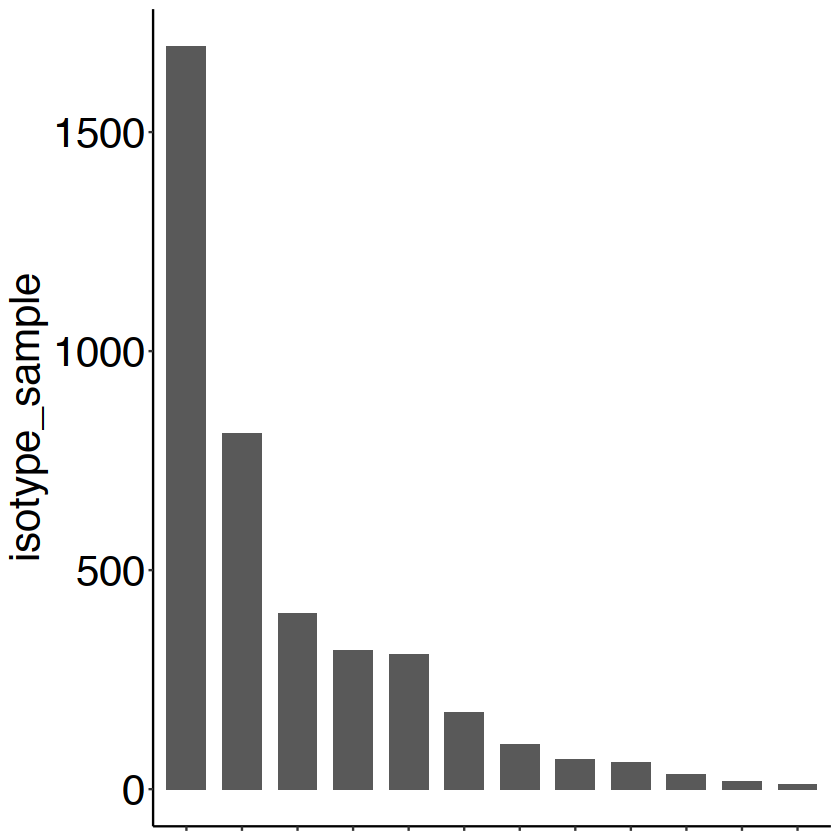

In [59]:
total_isotypes_p

Convert to percentage within each cancer type

In [60]:
cgenes_perc <- cgenes/rowSums(cgenes)
cgenes_perc

,Unknown,IGHA1,IGHA2,IGHD,IGHE,IGHM,IGHG1,IGHG2,IGHG3,IGHG4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NFB,0.1464646,0.14141414,0.10101010,0.005050505,0.0050505051,0.03535354,0.2474747,0.1717172,0.06565657,0.08080808
CPH,0.1536328,0.11008714,0.05228102,0.003232076,0.0007861807,0.02231880,0.3060208,0.1729161,0.09377389,0.08495119
pedLGG,0.1405602,0.14750490,0.06481313,0.004670340,0.0006202795,0.02794906,0.2853894,0.1608835,0.09232435,0.07528490
MB,0.1822186,0.10734930,0.05174787,0.007982384,0.0005505092,0.07789705,0.2691990,0.1456097,0.08973300,0.06771263
pedHGG,0.2410562,0.11953436,0.06416809,0.005678592,0.0005678592,0.04684838,0.2470187,0.1612720,0.06388416,0.04997161
EPN,0.1445983,0.30047576,0.12417812,0.004062650,0.0003207356,0.04383386,0.1799861,0.1022077,0.05586144,0.04447533
SCHW,0.1370143,0.13292434,0.08711656,0.003271984,0.0000000000,0.05848671,0.2286299,0.1725971,0.08957055,0.09038855
CP,0.1858639,0.19240838,0.09685864,0.008507853,0.0000000000,0.06217277,0.1996073,0.1223822,0.07198953,0.06020942
ATRT,0.1740761,0.13515444,0.05659704,0.002231744,0.0008034280,0.03936797,0.2803964,0.1644349,0.07936083,0.06757722


In [61]:
cgenes_perc$cohort <- rownames(cgenes_perc)

In [62]:
cgenes_m <- reshape2::melt(cgenes_perc)

Using cohort as id variables



In [63]:
cohortorder <- levels(total_isotypes$cohort)

In [64]:
cgenes_m$cohort <- factor(cgenes_m$cohort, levels = levels(total_isotypes$cohort))

In [65]:
colpal <- c(
"IGHA1" = "#74a9cf",
"IGHA2" = "#034e7b",
"IGHD" = "#bf812d", 
"IGHE" = "#5aae61",
"IGHM" = "#762a83",
"IGHG1" = "#fc8d59",
"IGHG2" = "#ef6548",
"IGHG3" = "#d7301f",
"IGHG4" = "#990000",
"Unknown" = "#bababa")

In [66]:
isotypes_stacked <- ggplot(cgenes_m, 
                            aes(x = cohort, y = value, fill = variable)) + 
geom_bar(stat = "identity",
        width = 0.7) + scale_fill_manual(values = colpal) + 
myplot + theme(legend.position = "bottom", legend.title = element_blank()) +
  theme(axis.title = element_blank(),
        axis.line = element_line(color = "black"),
        axis.text.x = element_text(size = 25,angle = 45, hjust = 1, color = "black"),
        axis.text.y = element_text(size = 25, color = "black")) 

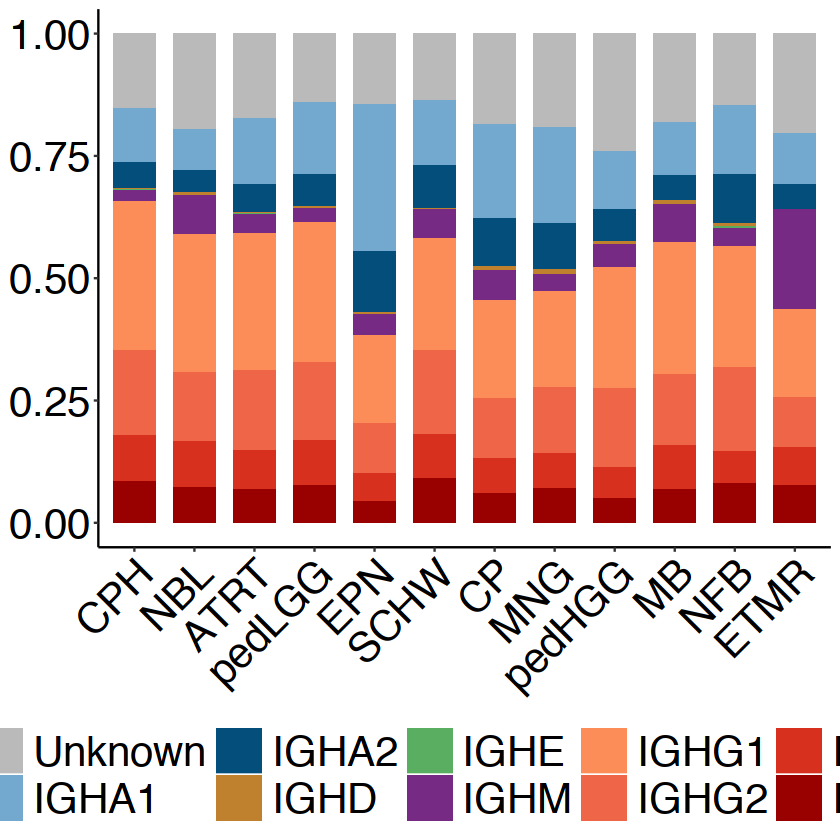

In [67]:
isotypes_stacked 

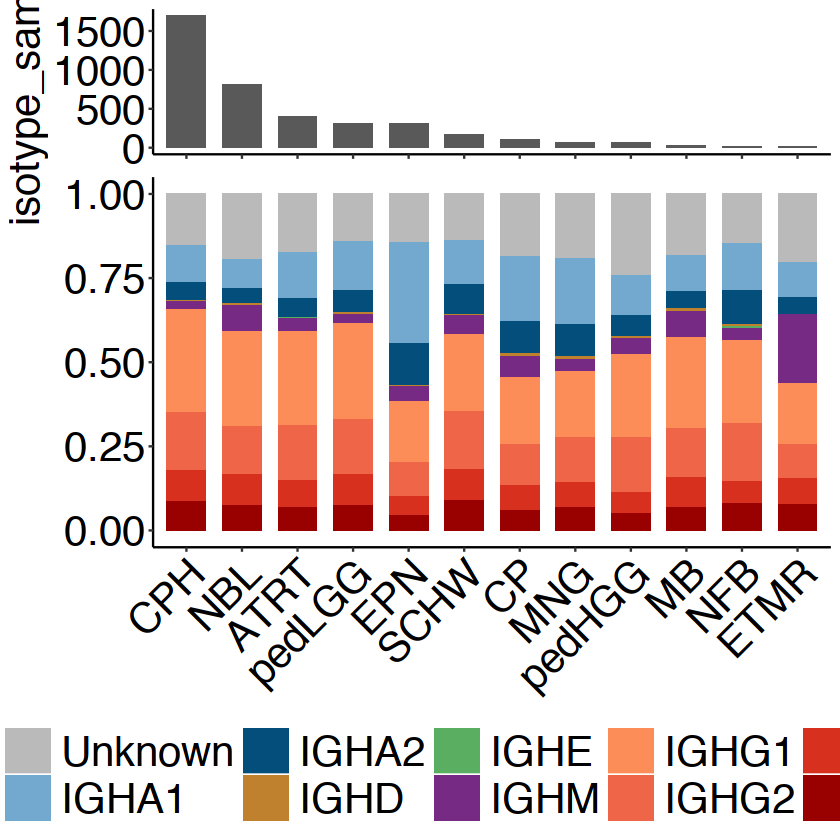

In [68]:
 gA <- ggplotGrob(isotypes_stacked)
 gB <- ggplotGrob(total_isotypes_p)
 maxWidth = grid::unit.pmax(gA$widths[2:5], gB$widths[2:5])
 gA$widths[2:5] <- as.list(maxWidth)
 gB$widths[2:5] <- as.list(maxWidth)
 grid.arrange(gB, gA, ncol=1, heights = c(1,4))

In [69]:
pdf(file = paste0(plotpath,"isotypes_IGH.pdf"),
        width = 10, 
        height = 15,
        useDingbats = FALSE)
 grid.arrange(gB, gA, ncol=1, heights = c(1,3))
dev.off()

pdf 
  2

## IGH isotypes in immune clusters

In [70]:
table(all_merge$immune_cluster)


Pediatric inflamed     Myeloid-driven     Pediatric cold    Immune excluded 
            109791              60929              22360               5118 

In [71]:
cgenes <- as.data.frame(matrix(ncol = 10, nrow = 4))
rownames(cgenes) <- unique(all_merge$immune_cluster)
colnames(cgenes) <- c("Unknown","IGHA1" ,"IGHA2","IGHD", "IGHE" ,"IGHM",
                      "IGHG1","IGHG2","IGHG3","IGHG4")

In [72]:
for(i in 1:nrow(cgenes)){
    tmp <- all_merge_separate[all_merge_separate$immune_cluster == rownames(cgenes)[i],]
    mytab <- as.data.frame(table(tmp$Cgene), stringsAsFactors = F)
    cgenes[i, match(mytab$Var1, colnames(cgenes))] <- mytab$Freq   
}

In [73]:
cgenes

,Unknown,IGHA1,IGHA2,IGHD,IGHE,IGHM,IGHG1,IGHG2,IGHG3,IGHG4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Myeloid-driven,15295,10633,5003,423,41,3957,24560,13833,8039,6806
Immune excluded,1619,904,537,29,1,228,1942,1123,687,568
Pediatric cold,5976,3584,1743,178,23,1636,9319,5103,3237,2401
Pediatric inflamed,25662,20774,9525,851,66,8703,44309,23252,13904,11248


In [74]:
total_isotypes <- as.data.frame(rowSums(cgenes))

In [75]:
total_isotypes$immune_cluster <- rownames(total_isotypes)

colnames(total_isotypes) <- c("total_isotypes", "immune_cluster")

In [76]:
ped_samples <- metadata_IC[metadata_IC$sample_id %in% all_merge_separate$sample_id,]

In [77]:
ped_samples_IC <- as.data.frame(table(ped_samples$immune_cluster), stringsAsFactors = F)

In [78]:
colnames(ped_samples_IC) <- c("immune_cluster", "samples")

In [79]:
total_isotypes <- merge(total_isotypes, ped_samples_IC, by = "immune_cluster")

In [80]:
total_isotypes$isotype_sample <- total_isotypes$total_isotypes/total_isotypes$samples

In [81]:
total_isotypes

immune_cluster,total_isotypes,samples,isotype_sample
<chr>,<dbl>,<int>,<dbl>
Immune excluded,7638,130,58.75385
Myeloid-driven,88590,244,363.07377
Pediatric cold,33200,278,119.42446
Pediatric inflamed,158294,90,1758.82222


In [82]:
total_isotypes$immune_cluster <- factor(total_isotypes$immune_cluster, levels = total_isotypes$immune_cluster[order(total_isotypes$isotype_sample, decreasing = T)])

In [83]:
total_isotypes_p <- ggplot(total_isotypes, 
                            aes(x = immune_cluster, y = isotype_sample)) + 
geom_bar(stat = "identity", width = 0.7) + myaxis + myplot +
theme(axis.title.x=element_blank(),axis.text.x=element_blank())

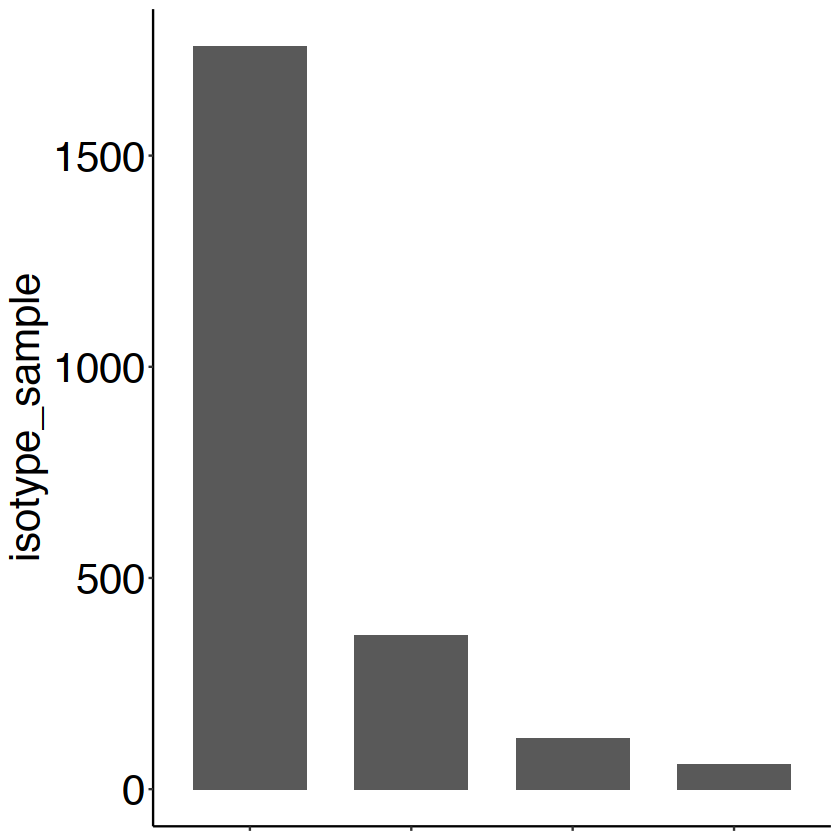

In [84]:
total_isotypes_p

Convert to percentage within each cancer type

In [85]:
cgenes_perc <- cgenes/rowSums(cgenes)
cgenes_perc

,Unknown,IGHA1,IGHA2,IGHD,IGHE,IGHM,IGHG1,IGHG2,IGHG3,IGHG4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Myeloid-driven,0.1726493,0.1200248,0.05647364,0.004774805,0.0004628062,0.04466644,0.2772322,0.1561463,0.09074388,0.07682583
Immune excluded,0.2119665,0.1183556,0.07030636,0.003796805,0.0001309243,0.02985075,0.2542550,0.1470280,0.08994501,0.07436502
Pediatric cold,0.1800000,0.1079518,0.05250000,0.005361446,0.0006927711,0.04927711,0.2806928,0.1537048,0.09750000,0.07231928
Pediatric inflamed,0.1621161,0.1312368,0.06017284,0.005376072,0.0004169457,0.05497997,0.2799159,0.1468912,0.08783656,0.07105765


In [86]:
cgenes_perc$immune_cluster <- rownames(cgenes_perc)

In [87]:
cgenes_m <- reshape2::melt(cgenes_perc)

Using immune_cluster as id variables



In [88]:
cohortorder <- levels(total_isotypes$immune_cluster)

In [89]:
cgenes_m$immune_cluster <- factor(cgenes_m$immune_cluster, levels = levels(total_isotypes$immune_cluster))

In [90]:
colpal <- c(
"IGHA1" = "#74a9cf",
"IGHA2" = "#034e7b",
"IGHD" = "#bf812d", 
"IGHE" = "#5aae61",
"IGHM" = "#762a83",
"IGHG1" = "#fc8d59",
"IGHG2" = "#ef6548",
"IGHG3" = "#d7301f",
"IGHG4" = "#990000",
"Unknown" = "#bababa")

In [93]:
isotypes_stacked <- ggplot(cgenes_m, 
                            aes(x = immune_cluster, y = value, fill = variable)) + 
geom_bar(stat = "identity",
        width = 0.7) + scale_fill_manual(values = colpal) + 
myplot + theme(legend.position = "bottom", legend.title = element_blank()) +
  theme(axis.title = element_blank(),
        axis.line = element_line(color = "black"),
        axis.text.x = element_text(size = 25, color = "black", angle = 45, hjust = 1),
        axis.text.y = element_text(size = 25, color = "black")) 

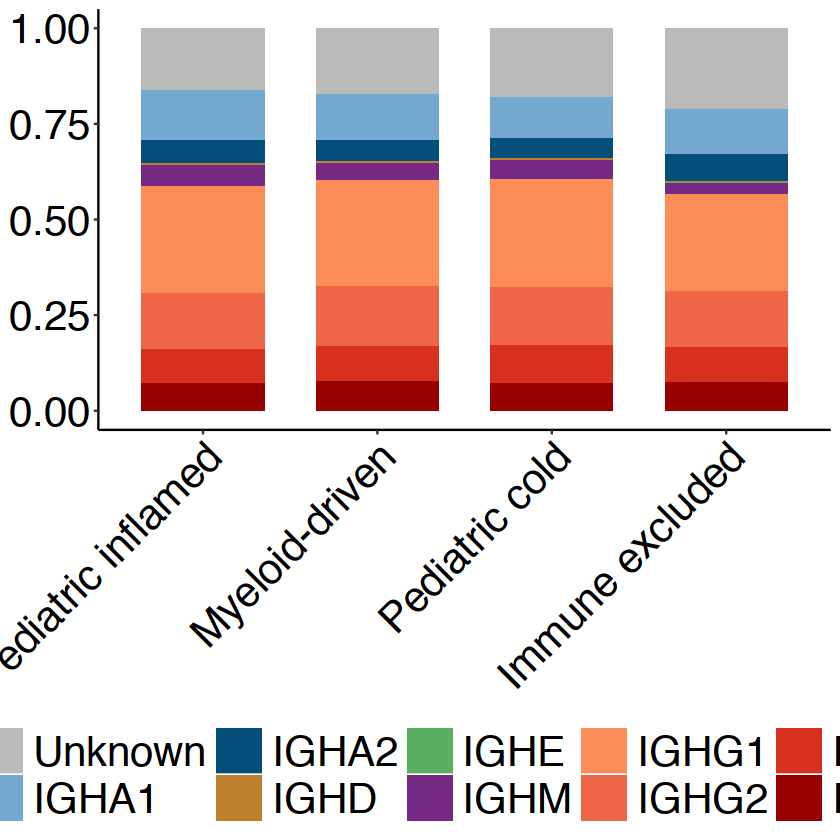

In [94]:
isotypes_stacked 

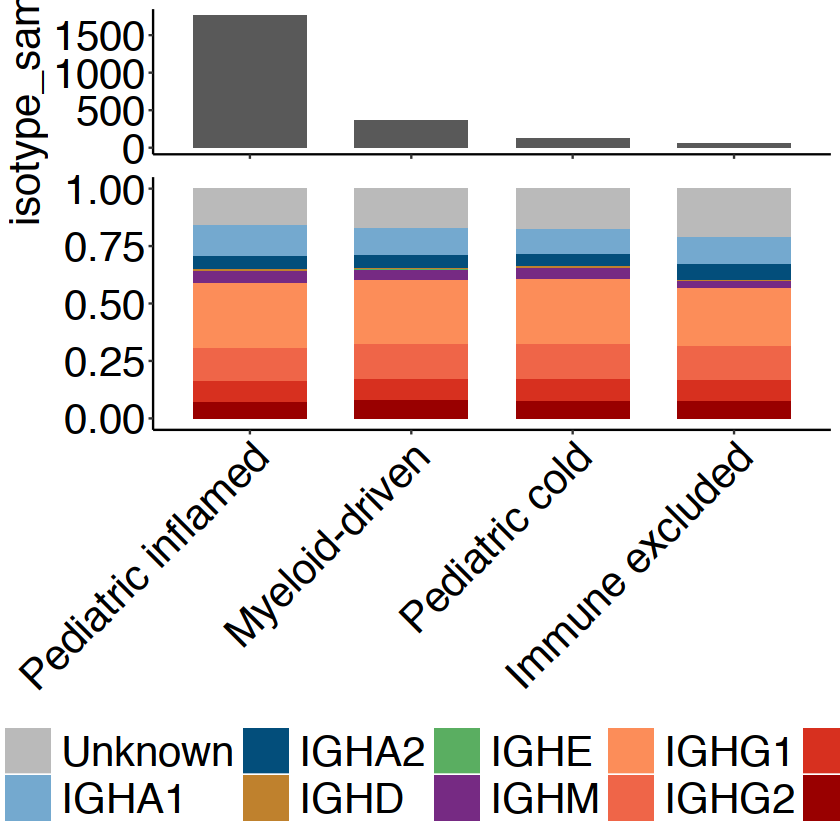

In [95]:
 gA <- ggplotGrob(isotypes_stacked)
 gB <- ggplotGrob(total_isotypes_p)
 maxWidth = grid::unit.pmax(gA$widths[2:5], gB$widths[2:5])
 gA$widths[2:5] <- as.list(maxWidth)
 gB$widths[2:5] <- as.list(maxWidth)
 grid.arrange(gB, gA, ncol=1, heights = c(1,4))

In [96]:
pdf(file = paste0(plotpath,"isotypes_IGH_IC.pdf"),
        width = 10, 
        height = 15,
        useDingbats = FALSE)
 grid.arrange(gB, gA, ncol=1, heights = c(1,3))
dev.off()

pdf 
  2

# IGH in MBs

In [159]:
all[ grepl("ICGC_MB102",all$sample_id),]

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,⋯,aaSeqCDR1,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,filename,sample_id,aliquot
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>
253697,1,1,1,TGTGCGAGAACGCGAAGTGATCTATTGTCCATGAGTCCGGTGTTTTTCTTTGACTACTGG,EIGHGGIBEHNNNNNNNNNNNNNNNNNNNNGHHEIEFHGG8CDGIIJIJJIBHIJGNNNN,"IGHV1-18*00(150),IGHV1-2*00(150)","IGHD4-17*00(33),IGHD4-23*00(33),IGHD2-2*00(30)",IGHJ4*00(220),IGHM*00(260),342|351|373|0|9||45.0;342|351|373|0|9||45.0,⋯,NA,NA,NA,NA,CARTRSDLLSMSPVFFFDYW,NA,:::::::::0:-2:9:29:2:-5:42:47:-4:60:::,ICGC_MB102,ICGC_MB102,ICGC_MB102


In [85]:
ICGC_MBs <- all[ grepl("ICGC_MB",all$sample_id),]

In [86]:
dim(ICGC_MBs)

[1] 446  38

In [87]:
tmp <- as.data.frame(table(ICGC_MBs$sample_id), stringsAsFactors = F)

In [88]:
tmp[ order(tmp$Freq, decreasing = T),]

,Var1,Freq
,<chr>,<int>
19,ICGC_MB185,117
46,ICGC_MB84,57
7,ICGC_MB119,56
15,ICGC_MB166,35
39,ICGC_MB302,25
25,ICGC_MB224,21
32,ICGC_MB266,19
35,ICGC_MB278,13
13,ICGC_MB148,12


In [97]:
icgc_mb_metadata <- primary_estimate_manifest_quanti[ primary_estimate_manifest_quanti$cohort == "MB" &
                                                    primary_estimate_manifest_quanti$group == "DKFZ",]

In [161]:
table(icgc_mb_metadata$disease_type)


MB_Group3 MB_Group4    MB_SHH    MB_WNT 
       29        54        19         9 

In [158]:
icgc_mb_metadata[, c("sample_id", "disease_type")]

,sample_id,disease_type
,<chr>,<chr>
840,ICGC_MB102,MB_SHH
841,ICGC_MB106,MB_Group3
842,ICGC_MB107,MB_WNT
843,ICGC_MB108,MB_Group4
844,ICGC_MB110,MB_Group4
845,ICGC_MB111,MB_Group3
846,ICGC_MB112,MB_WNT
847,ICGC_MB113,MB_WNT
848,ICGC_MB114,MB_Group4


In [98]:
dim(icgc_mb_metadata$disease_type)

[1] 111  33

In [99]:
icgc_mb_metadata$number_of_unique_IghCDR3 <- tmp$Freq[match(icgc_mb_metadata$sample_id, tmp$Var1)]

In [106]:
tmp$Var1[!tmp$Var1 %in% icgc_mb_metadata$sample_id]

[1] "ICGC_MB128" "ICGC_MB136" "ICGC_MB148" "ICGC_MB180" "ICGC_MB194"
 [6] "ICGC_MB213" "ICGC_MB234" "ICGC_MB266" "ICGC_MB268" "ICGC_MB283"
[11] "ICGC_MB62"  "ICGC_MB63"

In [104]:
summary(icgc_mb_metadata$number_of_unique_IghCDR3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       2      10       4     117      72 

In [107]:
ICGC_MBs_sep <- separate_rows(ICGC_MBs, allCHitsWithScore,sep = ",")

In [108]:
ICGC_MBs_sep$Cgene <- gsub("[*].*", "", ICGC_MBs_sep$allCHitsWithScore)

ICGC_MBs_sep$CgeneScore <- gsub(".*[(]","", ICGC_MBs_sep$allCHitsWithScore)

ICGC_MBs_sep$CgeneScore <- gsub("[)]","", ICGC_MBs_sep$CgeneScore)

In [109]:
ICGC_MBs_sep$Cgene[ICGC_MBs_sep$Cgene == ""] <- "Unknown"

In [110]:
ICGC_MBs_sep <- ICGC_MBs_sep[ICGC_MBs_sep$Cgene != "IGHGP",]

In [111]:
length(tmp$Var1)

[1] 51

In [112]:
cgenes <- as.data.frame(matrix(ncol = 10, nrow = length(tmp$Var1)))
rownames(cgenes) <- tmp$Var1
colnames(cgenes) <- c("Unknown","IGHA1" ,"IGHA2","IGHD", "IGHE" ,"IGHM",
                      "IGHG1","IGHG2","IGHG3","IGHG4")

In [114]:
for(i in 1:nrow(cgenes)){
    tmp <- ICGC_MBs_sep[ICGC_MBs_sep$sample_id == rownames(cgenes)[i],]
    mytab <- as.data.frame(table(tmp$Cgene), stringsAsFactors = F)
    cgenes[i, match(mytab$Var1, colnames(cgenes))] <- mytab$Freq   
}

In [115]:
cgenes

,Unknown,IGHA1,IGHA2,IGHD,IGHE,IGHM,IGHG1,IGHG2,IGHG3,IGHG4
,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>
ICGC_MB102,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
ICGC_MB106,1,NA,NA,NA,NA,NA,1,NA,NA,NA
ICGC_MB112,1,NA,NA,NA,NA,NA,NA,3,1,3
ICGC_MB113,NA,NA,NA,NA,NA,NA,1,NA,NA,NA
ICGC_MB117,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ICGC_MB118,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ICGC_MB119,15,4,NA,NA,NA,6,25,4,14,3
ICGC_MB122,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ICGC_MB128,NA,NA,NA,NA,NA,NA,1,NA,NA,NA


In [116]:
icgc_mb_metadata_igh <- cbind(icgc_mb_metadata,
                             cgenes[match(icgc_mb_metadata$sample_id,rownames(cgenes)),])

In [118]:
icgc_mb_metadata_igh[ icgc_mb_metadata_igh$sample_id == "ICGC_MB119",]

,sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,Unknown,IGHA1,IGHA2,IGHD,IGHE,IGHM,IGHG1,IGHG2,IGHG3,IGHG4
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>
851,ICGC_MB119,ICGC_MB119,-1438.522,-1967.332,-3405.854,ICGC_MB119,ICGC_MB119,Female,NA,NA,⋯,15,4,NA,NA,NA,6,25,4,14,3


In [160]:
icgc_mb_metadata_igh$number_of_unique_IghCDR3[ icgc_mb_metadata_igh$sample_id == "ICGC_MB102"]

[1] 1

In [119]:
tapply(icgc_mb_metadata_igh$number_of_unique_IghCDR3,
      icgc_mb_metadata_igh$disease_type, summary)

$MB_Group3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       2       5       2      35      16 

$MB_Group4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     2.0     2.0    18.2    12.5   117.0      39 

$MB_SHH
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.250   3.000   7.333   9.250  25.000      13 

$MB_WNT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     1.0     1.0     1.6     1.0     4.0       4 


In [130]:
table(icgc_mb_metadata_igh$disease_type)


MB_Group3 MB_Group4    MB_SHH    MB_WNT 
       29        54        19         9 

In [138]:
tapply(icgc_mb_metadata_igh$number_of_unique_IghCDR3,
      icgc_mb_metadata_igh$disease_type, summary)

$MB_Group3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       2       5       2      35      16 

$MB_Group4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     2.0     2.0    18.2    12.5   117.0      39 

$MB_SHH
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.250   3.000   7.333   9.250  25.000      13 

$MB_WNT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     1.0     1.0     1.6     1.0     4.0       4 


In [157]:
pairwise.wilcox.test(icgc_mb_metadata_igh$number_of_unique_IghCDR3,
                    icgc_mb_metadata_igh$disease_type, p.adjust = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  icgc_mb_metadata_igh$number_of_unique_IghCDR3 and icgc_mb_metadata_igh$disease_type 

          MB_Group3 MB_Group4 MB_SHH
MB_Group4 0.131     -         -     
MB_SHH    0.434     0.873     -     
MB_WNT    0.327     0.064     0.162 

P value adjustment method: none 

# Numbers in text

In [181]:
length(unique(all_merge$nSeqCDR3))

[1] 174993

In [182]:
length(unique(all_merge$sample_id))

[1] 606

In [183]:
total_isotypes

cohort,total_isotypes,samples,isotype_sample
<fct>,<dbl>,<int>,<dbl>
ATRT,13212,21,629.14286
CP,973,11,88.45455
CPH,22193,20,1109.65000
EPN,18298,50,365.96000
ETMR,13,1,13.00000
EWS,227,5,45.40000
MB,1853,13,142.53846
MNG,820,12,68.33333
NBL,96570,115,839.73913


## CDR3 length histograms

In [45]:
all_merge$CDR3length <- nchar(all_merge$aaSeqCDR3)

In [46]:
tapply(all_merge$CDR3length, all_merge$Cgene, summary)

$IGHA1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.0    15.0    17.0    17.2    20.0    62.0 

$IGHA2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   13.00   16.00   15.77   18.00   34.00 

$IGHD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   15.00   17.00   17.62   20.00   42.00 

$IGHE
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   10.0    15.0    17.0    17.3    19.0    27.0 

$IGHG1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   15.00   17.00   17.74   20.00   77.00 

$IGHG2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   13.00   16.00   16.11   19.00   30.00 

$IGHG3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   16.00   19.00   18.45   21.00   42.00 

$IGHG4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   15.00   17.00   17.76   21.00   32.00 

$IGHM
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   14.00   16.00   16.19   18.00   78.00 

$Unknown
   Min. 1st Qu.  Median    Mean 3rd Qu. 

collapse all lengths to 30 and change label to >30

In [47]:
all_merge$CDR3length[all_merge$CDR3length > 30] <- 30

In [48]:
summary(all_merge$CDR3length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   15.00   17.00   17.54   20.00   30.00 

geom_histogram doesnt behave well with limits(), use coord_cartesian instead to align all.

In [49]:
ighm_cdr3 <- ggplot(data = all_merge[all_merge$Cgene == "IGHM",]) + geom_histogram(aes(x = CDR3length), binwidth= 1, center = 0) +
myplot + myaxis +
scale_x_continuous(breaks = seq(0, 30, by = 5)) + 
coord_cartesian(x = c(5,30)) +
labs(title = "IGHM CDR3 length")

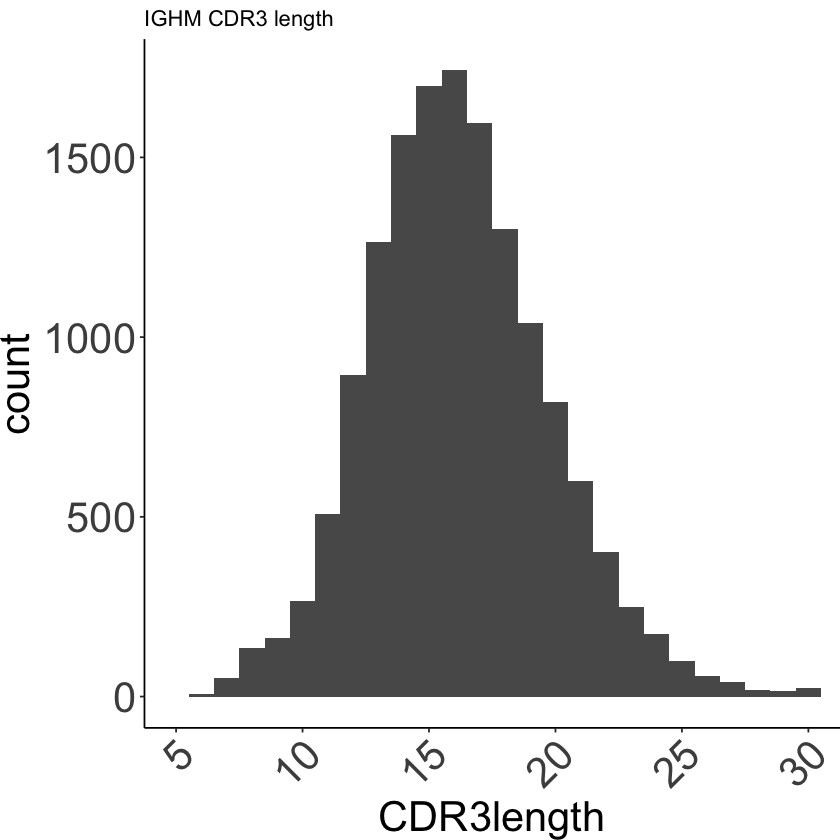

In [50]:
ighm_cdr3

In [51]:
igha2_cdr3 <- ggplot(data = all_merge[all_merge$Cgene == "IGHA2",]) + geom_histogram(aes(x = CDR3length), binwidth= 1, center = 0) + 
myplot + myaxis +
scale_x_continuous(breaks = seq(0, 30, by = 5)) + 
coord_cartesian(x = c(5,30)) +
labs(title = "IGHA2 CDR3 length")

In [52]:
igha1_cdr3 <- ggplot(data = all_merge[all_merge$Cgene == "IGHA1",]) + geom_histogram(aes(x = CDR3length), binwidth= 1, center = 0) + 
myplot + myaxis +
scale_x_continuous(breaks = seq(0, 30, by = 5)) + 
coord_cartesian(x = c(5,30)) +
labs(title = "IGHA1 CDR3 length")

In [53]:
ighg1_cdr3 <- ggplot(data = all_merge[all_merge$Cgene == "IGHG1",]) + geom_histogram(aes(x = CDR3length),binwidth= 1, center = 0) + 
myplot + myaxis +
scale_x_continuous(breaks = seq(0, 30, by = 5)) + 
coord_cartesian(x = c(5,30)) +
labs(title = "IGHG1 CDR3 length")

In [54]:
ighg2_cdr3 <- ggplot(data = all_merge[all_merge$Cgene == "IGHG2",]) + geom_histogram(aes(x = CDR3length), binwidth= 1, center = 0) + 
myplot + myaxis +
scale_x_continuous(breaks = seq(0, 30, by = 5)) + 
coord_cartesian(x = c(5,30)) +
labs(title = "IGHG2 CDR3 length")

In [55]:
ighg3_cdr3 <- ggplot(data = all_merge[all_merge$Cgene == "IGHG3",]) + geom_histogram(aes(x = CDR3length), binwidth= 1, center = 0) +
myplot + myaxis +
scale_x_continuous(breaks = seq(0, 30, by = 5)) +
coord_cartesian(x = c(5,30)) + 
labs(title = "IGHG3 CDR3 length")

In [56]:
ighg4_cdr3 <- ggplot(data = all_merge[all_merge$Cgene == "IGHG4",]) + geom_histogram(aes(x = CDR3length), binwidth= 1, center = 0) +
myplot + myaxis +
scale_x_continuous(breaks = seq(0, 30, by = 5)) + 
coord_cartesian(x = c(5,30)) +
labs(title = "IGHG4 CDR3 length")

In [61]:
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:BiocGenerics’:

    combine



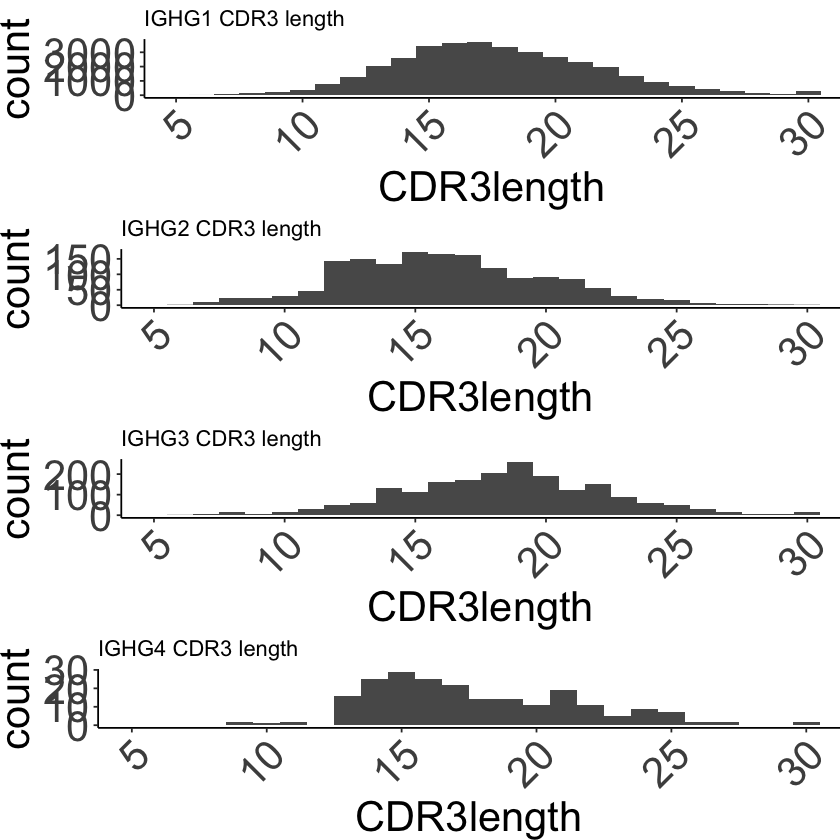

In [62]:
grid.arrange(
ighg1_cdr3,
ighg2_cdr3,
ighg3_cdr3,
ighg4_cdr3, 
ncol = 1)

In [63]:
pdf(file = paste0(plotpath,"CDR3length_IGHG.pdf"),
        width = 15, 
        height = 16,
        useDingbats = FALSE)
grid.arrange(
ighg1_cdr3 + theme(axis.title.x = element_blank(), axis.text.x = element_blank(),
plot.title = element_text(size = 25)),
ighg2_cdr3 + theme(axis.title.x = element_blank(), axis.text.x = element_blank(),
plot.title = element_text(size = 25)),
ighg3_cdr3 + theme(axis.title.x = element_blank(), axis.text.x = element_blank(),
plot.title = element_text(size = 25)),
ighg4_cdr3 + theme(axis.title.x = element_blank(),
plot.title = element_text(size = 25)),
    ncol = 1)
dev.off()

pdf 
  2

In [64]:
pdf(file = paste0(plotpath,"CDR3length_IGH.pdf"),
        width = 15, 
        height = 4,
        useDingbats = FALSE)
ighm_cdr3
igha1_cdr3
igha2_cdr3
ighg1_cdr3
ighg2_cdr3
ighg3_cdr3
ighg4_cdr3
dev.off()

pdf 
  2